<center>
<h1>Pandas在金融数据分析中的应用</h1>
<br>
<h3>殷海明</h3><br>
<h3><img src='http://pyconcn.qiniucdn.com/zoomquiet/res/logo/150801-cnpycon-barnner-h80.png' alt="PyCon 2015 China"></h3>
</center>


关于我
===


 * Golang, Python, Ruby, PHP
 * 私募基金经理，程序化交易系统，量化研发平台
 * @yinhm
 * https://github.com/yinhm



## 为何使用Python进行数据分析？

* Python作为通用语言，研发和生产可以用一套代码
* Python成为数据科学领域标准语言
 - 工程上，科研上都能得心应手，生产率高
 - 语言本身足够鲁棒，交互式数据处理环境（Jupyter，Bokth等）
 - 简单易学，团队易接受
 - Python社区发达，各种库
* 其它方案：
 - R库丰富，语法怪异，生产环境不友好
 - Matlab不开源，社区较弱

<center> <h2>The PyData Stack</h2>

<center><img src='pydata_stack-4.jpg' width=70%></center>

## Pandas缘起

 * 为数据分析而生，受R data.frame启发，超越R
 * 作者认为R存在不足（语言本身，速度，内存占用，通用库，工具以及GPL授权）
 * 用于数据清洗，金融建模，统计建模，计量分析等
 

## Pandas是什么

 * **pan**el **da**ta **s**tructures
 * 各种数据分析统计数据结构
 * 数据索引、切片，可存储异构数据
 * 类似 R data.frame，特性更丰富
 * 支持 Missing data
 * 对时序数据支持极佳
 * 始自 AQR 2008, 2011年发布0.3，最新 0.17 RC1
 * Python（大）数据分析基本工具
 

## Pandas概要

 * 支持快速排列，查询， 分级索引等
 * 高性能数据结构
  - Series/TimeSeries: 1D labeled vector
  - DataFrame: 2D 数据表
  - Panel: 3D labeled array, collection of DataFrames
 * 类SQL特性: GroupBy, joining/merging, etc
 * 缺失数据处理
 * 时序数据支持

## 如何学习Pandas

* ipython（现在叫 jupyter），numpy
* Pandas入门教程: http://pandas.pydata.org/pandas-docs/stable/tutorials.html
* Pandas作者《利用Python进行数据分析》<center><img src='pandas-book.jpg' width=70%></center>

## Pandas Series

In [8]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#matplotlib.style.use('ggplot')
%matplotlib inline

In [9]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0     1
1     3
2     5
3   NaN
4     6
5     8
dtype: float64

## DataFrame

In [10]:
index = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=index, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.023772,-0.004207,-0.297225,-0.054452
2013-01-02,-0.865695,0.135001,-0.235754,0.130876
2013-01-03,-0.666623,-0.816342,-0.330656,1.351578
2013-01-04,0.841814,0.037691,-0.080182,-0.116882
2013-01-05,-0.116637,0.638748,-0.431578,-0.708006
2013-01-06,0.979481,0.083391,-0.897525,0.707786


In [11]:
df[df.A > 0]

,A,B,C,D
2013-01-04,0.841814,0.037691,-0.080182,-0.116882
2013-01-06,0.979481,0.083391,-0.897525,0.707786


In [12]:
df.mean()

A    0.024761
B    0.012380
C   -0.378820
D    0.218483
dtype: float64

In [13]:
df.mean(axis='columns')

2013-01-01   -0.094914
2013-01-02   -0.208893
2013-01-03   -0.115511
2013-01-04    0.170610
2013-01-05   -0.154368
2013-01-06    0.218283
Freq: D, dtype: float64

In [14]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })

df2

,A,B,C,D,E,F
0,1,2013-01-02,1,3,test,foo
1,1,2013-01-02,1,3,train,foo
2,1,2013-01-02,1,3,test,foo
3,1,2013-01-02,1,3,train,foo


In [15]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### Grouping

In [16]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.723312,1.312312
1,bar,one,0.826252,1.791680
2,foo,two,-0.263170,0.480115
3,bar,three,0.064571,-0.161596
4,foo,two,-0.033287,-1.329652
5,bar,two,-0.746722,1.199988
6,foo,one,-0.379138,2.078708
7,foo,three,-0.645134,1.360630


In [17]:
df.groupby('A').sum()

,C,D
A,,
bar,0.144101,2.830072
foo,-3.044041,3.902113


In [18]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.826252  1.791680
    three  0.064571 -0.161596
    two   -0.746722  1.199988
foo one   -2.102451  3.391021
    three -0.645134  1.360630
    two   -0.296457 -0.849537

In [19]:
close_px = pd.read_pickle('close_px.pickle')
close_px[-5:]

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2011-10-10,10.09,388.81,16.14,186.62,64.43,26.94,61.87,1194.89,76.28
2011-10-11,10.30,400.29,16.14,185.00,63.96,27.00,60.95,1195.54,76.27
2011-10-12,10.05,402.19,16.40,186.12,64.33,26.96,62.70,1207.25,77.16
2011-10-13,10.10,408.43,16.22,186.82,64.23,27.18,62.36,1203.66,76.37
2011-10-14,10.26,422.00,16.60,190.53,64.72,27.27,62.24,1224.58,78.11


In [20]:
df = close_px.ix[-5:, ['AAPL', 'IBM', 'MSFT']]
df

,AAPL,IBM,MSFT
2011-10-10,388.81,186.62,26.94
2011-10-11,400.29,185.00,27.00
2011-10-12,402.19,186.12,26.96
2011-10-13,408.43,186.82,27.18
2011-10-14,422.00,190.53,27.27


In [21]:
df['Ratio'] = df['IBM'] / df['MSFT']
df

,AAPL,IBM,MSFT,Ratio
2011-10-10,388.81,186.62,26.94,6.927246
2011-10-11,400.29,185.00,27.00,6.851852
2011-10-12,402.19,186.12,26.96,6.903561
2011-10-13,408.43,186.82,27.18,6.873436
2011-10-14,422.00,190.53,27.27,6.986799


In [22]:
del df['Ratio']
df

,AAPL,IBM,MSFT
2011-10-10,388.81,186.62,26.94
2011-10-11,400.29,185.00,27.00
2011-10-12,402.19,186.12,26.96
2011-10-13,408.43,186.82,27.18
2011-10-14,422.00,190.53,27.27


In [23]:
df.index

DatetimeIndex(['2011-10-10', '2011-10-11', '2011-10-12', '2011-10-13',
               '2011-10-14'],
              dtype='datetime64[ns]', freq=None, tz=None)

In [24]:
df.columns

Index([u'AAPL', u'IBM', u'MSFT'], dtype='object')

# 应用: 日收益率计算

定义: 
$$ $$
$$r_t = \frac{p_t}{p_{t-1}} - 1$$

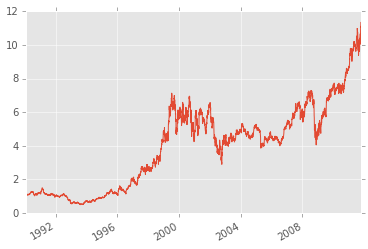

In [25]:
rets = close_px / close_px.shift(1) - 1
daily_index = (1 + rets).cumprod()
daily_index['IBM'].plot()

In [26]:
monthly_index = daily_index.asfreq('EOM')
monthly_index[10:18]

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-12-31,0.963855,1.293893,0.958188,1.210244,1.374707,1.607843,1.359272,1.004349,1.158497
1991-01-31,1.086345,1.669211,1.069686,1.357356,1.463700,2.098039,1.438742,1.046048,1.155229
1991-02-28,1.082329,1.726463,1.142857,1.391900,1.578454,2.215686,1.713576,1.116427,1.250000
1991-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,1.146586,1.657761,1.191638,1.113758,1.817330,2.117647,1.672185,1.141580,1.349673
1991-05-31,1.208835,1.421120,1.310105,1.160810,1.749415,2.352941,1.645695,1.185650,1.336601
1991-06-28,1.146586,1.254453,1.254355,1.062537,1.613583,2.196078,1.528146,1.128866,1.333333
1991-07-31,1.206827,1.398219,1.240418,1.107802,1.768150,2.352941,1.678808,1.179507,1.362745


In [27]:
# oops, careful about those NAs!
monthly_index = daily_index.asfreq('EOM', method='ffill')
monthly_index[10:18]

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-12-31,0.963855,1.293893,0.958188,1.210244,1.374707,1.607843,1.359272,1.004349,1.158497
1991-01-31,1.086345,1.669211,1.069686,1.357356,1.463700,2.098039,1.438742,1.046048,1.155229
1991-02-28,1.082329,1.726463,1.142857,1.391900,1.578454,2.215686,1.713576,1.116427,1.250000
1991-03-29,1.106426,2.049618,1.170732,1.231090,1.843091,2.274510,1.796358,1.141215,1.326797
1991-04-30,1.146586,1.657761,1.191638,1.113758,1.817330,2.117647,1.672185,1.141580,1.349673
1991-05-31,1.208835,1.421120,1.310105,1.160810,1.749415,2.352941,1.645695,1.185650,1.336601
1991-06-28,1.146586,1.254453,1.254355,1.062537,1.613583,2.196078,1.528146,1.128866,1.333333
1991-07-31,1.206827,1.398219,1.240418,1.107802,1.768150,2.352941,1.678808,1.179507,1.362745


# 移动平均线

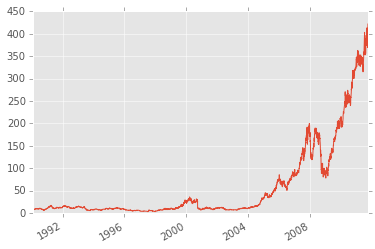

In [28]:
px = close_px['AAPL']
px.plot()

(0, 100)

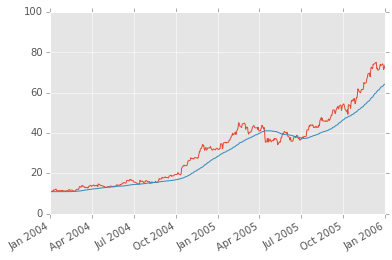

In [29]:
px.plot()
pd.rolling_mean(px, 60, min_periods=50).plot()
plt.xlim([pd.datetime(2004, 1, 1), pd.datetime(2006, 1, 1)])
plt.ylim([0, 100])

In [30]:
# only run the analysis since 2000
px = close_px.ix[pd.datetime(2000, 1, 1):]
rets = px / px.shift(1) - 1

# rets = rets.drop(['AAPL'], axis=1)

annualizer = np.sqrt(250)
bmk = rets.pop('SPX') # benchmark

rets[-5:]

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,XOM
2011-10-10,0.039135,0.051406,0.041290,0.023192,0.020592,0.026286,0.013930,0.036977
2011-10-11,0.020813,0.029526,0.000000,-0.008681,-0.007295,0.002227,-0.014870,-0.000131
2011-10-12,-0.024272,0.004747,0.016109,0.006054,0.005785,-0.001481,0.028712,0.011669
2011-10-13,0.004975,0.015515,-0.010976,0.003761,-0.001554,0.008160,-0.005423,-0.010238
2011-10-14,0.015842,0.033225,0.023428,0.019859,0.007629,0.003311,-0.001924,0.022784


In [31]:
tickers = rets.columns
weights = pd.Series(1. / len(tickers), index=tickers)
weights

# Some helper functions
def plot_returns(port_returns, bmk_returns):
    plt.figure()
    cum_port = ((1 + port_returns).cumprod() - 1)
    cum_bmk = ((1 + bmk_returns).cumprod() - 1)
    # cum_port = port_returns.cumsum()
    # cum_bmk = bmk_returns.cumsum()
    
    cum_port.plot(label='Portfolio returns')
    cum_bmk.plot(label='Benchmark')
    plt.title('Portfolio performance')
    plt.legend(loc='best')

def calc_te(weights, univ_rets, track_rets):
    port_rets = (univ_rets * weights).sum(1)
    return (port_rets - track_rets).std()


In [32]:
# brute force solver
def get_opt_holdings_opt(univ_rets, track_rets):
    import scipy.optimize as opt
    K = len(univ_rets.columns)
    init_weights = np.ones(K) / K
    result = opt.fmin_l_bfgs_b(calc_te, init_weights,
                               args=(univ_rets.values,
                                     track_rets.values),
                               approx_grad=True, factr=1e7, pgtol=1e-7)
    return pd.Series(result[0], index=univ_rets.columns)


clean_rets = rets.fillna(0)
clean_bmk = bmk.fillna(0)

opt_weights = get_opt_holdings_opt(clean_rets, clean_bmk)
opt_weights

AA      0.085665
AAPL    0.059990
GE      0.182695
IBM     0.125072
JNJ     0.096287
MSFT    0.128573
PEP     0.078985
XOM     0.151286
dtype: float64

In [38]:
def rolling_min_te_portfolio(univ_returns, track_returns, window=250, min_periods=100):
    ports = {}
    for i, cur_date in enumerate(univ_returns.index):
        if i < min_periods:
            continue

        univ_slice = univ_returns[max(0, i - window + 1) : i]
        track_slice = track_returns[max(0, i - window + 1) : i]

        univ_slice = univ_slice.ix[:, univ_slice.count() > 0]

        univ_slice = univ_slice.fillna(0)
        track_slice = track_slice.fillna(0)
        ports[cur_date] = get_opt_holdings_opt(univ_slice, track_slice)

    return pd.DataFrame(ports).T

ports = rolling_min_te_portfolio(rets, bmk)
ports

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,XOM
2000-05-25,0.065235,0.085536,0.266469,0.141680,0.096941,0.119851,0.029147,0.051542
2000-05-26,0.064837,0.085826,0.267593,0.140545,0.097038,0.118427,0.027764,0.050972
2000-05-30,0.060039,0.086177,0.264837,0.142174,0.094203,0.119263,0.034181,0.053691
2000-05-31,0.060046,0.084790,0.269072,0.146778,0.094402,0.121191,0.031860,0.055460
2000-06-01,0.060094,0.084736,0.269166,0.146722,0.094452,0.121209,0.031784,0.055405
2000-06-02,0.059618,0.089974,0.266128,0.142952,0.089774,0.123846,0.030354,0.055781
2000-06-05,0.067653,0.091146,0.263937,0.144436,0.085848,0.125224,0.032503,0.048051
2000-06-06,0.068033,0.091742,0.266060,0.141226,0.085104,0.124537,0.034528,0.047436
2000-06-07,0.069427,0.090095,0.273135,0.142250,0.088627,0.118899,0.020842,0.038994
2000-06-08,0.071354,0.089520,0.274226,0.135911,0.090030,0.118799,0.018621,0.039706


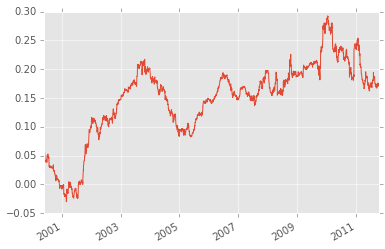

In [34]:
ports['XOM'].plot()

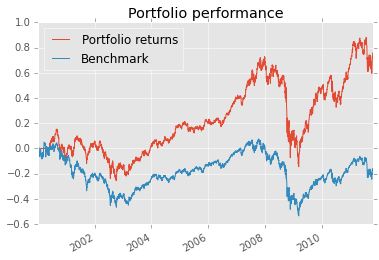

In [35]:
port_return = (ports.shift(1) * rets).sum(1)
plot_returns(port_return, bmk)

## 夏普比率（Sharpe Ratio）

In [36]:
def sharpe(rets, ann=250):
    return np.sqrt(ann) * rets.mean() / rets.std()
sharpe(port_return)

0.3368934389129985

In [37]:
sharpe(bmk)

0.042545533865768419

# PyData库

 * 高性能计算：[Cython](http://cython.org/), [Numba](http://numba.pydata.org/), [Theano](https://github.com/Theano/Theano
), [PyCUDA](http://mathema.tician.de/software/pycuda/)

 * 大数据： [Blaze](http://blaze.pydata.org/en/latest/) + [Dask](http://dask.pydata.org/en/latest/)  [Ibis](https://github.com/cloudera/ibis)  [PySpark](https://spark.apache.org/docs/0.9.0/python-programming-guide.html) [bcolz](https://github.com/Blosc/bcolz)

 * 交互数据可视化：[Bokeh](http://bokeh.pydata.org/en/latest/) [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) [Plotly](https://plot.ly)

## 参考资料

 * [Statistics and Data Analysis in Python with pandas and statsmodels](http://www.slideshare.net/wesm/data-analysis-and-statistics-in-python-using-pandas-and-statsmodels)
 * [Python for Financial Data Analysis with pandas](http://wesmckinney.com/blog/python-for-financial-data-analysis-with-pandas/)
 * [The Path of the PyData Ninja](https://github.com/twiecki/pydata_ninja)
 * [Timeseries Analysis in Python](https://github.com/changhiskhan/pydata2013)

# Q&A